# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

In [3]:
#Afficher les dimensions du dataset 
print("Le tableau comporte {} observation(s) ou article(s)".format(df.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df.shape[1]))

Le tableau comporte 26196 observation(s) ou article(s)
Le tableau comporte 9 colonne(s)


In [4]:
#On vérifie que le type des données attribué par pandas est cohérent  

#Affichage de la nature des données dans chacune des colonnes
print(df.dtypes)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


In [5]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(df.count())

date_mutation       26196
valeur_fonciere     26196
adresse_numero      26196
adresse_nom_voie    26196
code_postal         26196
nom_commune         26196
code_type_local     26196
type_local          26196
surface_reelle      26196
dtype: int64


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [6]:
# Pour extraire les valeurs uniques de la colonne 'type_local'
types_immobiliers = df['type_local'].unique()

# Afficher la liste des différents types de biens immobiliers
print("La liste des différents types de biens immobiliers que nous avons dans les données est :")
for type_immobilier in types_immobiliers:
     print(type_immobilier) 

La liste des différents types de biens immobiliers que nous avons dans les données est :
Appartement
Local industriel. commercial ou assimilé


In [7]:
# Donner le nombre de types de biens
df_type = df['type_local'].nunique()

# Extraire les valeurs uniques de la colonne 'type_local'
types_immobiliers = df['type_local'].unique()

# Utilisation de la fonction len() pour obtenir le nombre de types de bien
print("On observe qu'il y a", len(types_immobiliers), "types de bien") 


On observe qu'il y a 2 types de bien


In [8]:
# Donner leurs codes types

# Création dynamique du dictionnaire pour associer les codes aux types
types_locaux = {}
for code in df['code_type_local'].unique():
    type_local = df[df['code_type_local'] == code]['type_local'].iloc[0]  
    # Prendre le premier type correspondant au code
    types_locaux[code] = type_local

# Affichage du dictionnaire de correspondance
print("Leurs codes types sont :")
print(types_locaux)


Leurs codes types sont :
{2: 'Appartement', 4: 'Local industriel. commercial ou assimilé'}


### 3. Nombre de transactions

In [9]:
# Appliquer la fonction sur la colonne 'code_type_local' pour obtenir le type correspondant
df['type_correspondant'] = df['code_type_local'].map(types_locaux) 

#On verifie le nombre de transactions que nous avons dans notre dataframe
# Nombre total de transactions
nb_transactions_total = len(df)
print('Le nombre total de transactions dans les données est :', nb_transactions_total)

# Filtrer les transactions pour les appartements
nb_transactions_appartement = len(df[df['type_correspondant'] == 'Appartement'])
print('Le nombre de transactions pour les appartements dans les données est de', nb_transactions_appartement)

# Filtrer les transactions pour les locaux commerciaux
nb_transactions_locaux_commerciaux = len(df[df['type_correspondant'] == 'Local industriel. commercial ou assimilé'])
print('Le nombre de transactions pour les locaux commerciaux dans les données est de', nb_transactions_locaux_commerciaux)

Le nombre total de transactions dans les données est : 26196
Le nombre de transactions pour les appartements dans les données est de 24353
Le nombre de transactions pour les locaux commerciaux dans les données est de 1843


In [10]:
# Extraire l'année à partir de la colonne de dates
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour l'année 2020
df_appartements_2020 = df[(df['annee'] == 2020) & (df['type_correspondant'] == 'Appartement')]

# Filtrer les transactions pour l'année 2021
df_appartements_2021 = df[(df['annee'] == 2021) & (df['type_correspondant'] == 'Appartement')]

# Calculer le nombre de transactions pour les appartements en 2020
nb_transactions_appartements_2020 = len(df_appartements_2020)

# Calculer le nombre de transactions pour les appartements en 2021
nb_transactions_appartements_2021 = len(df_appartements_2021)

# Afficher les résultats
print(f'Le nombre de transactions pour les appartements en 2020 est de {nb_transactions_appartements_2020}.')
print(f'Le nombre de transactions pour les appartements en 2021 est de {nb_transactions_appartements_2021}.')

Le nombre de transactions pour les appartements en 2020 est de 4127.
Le nombre de transactions pour les appartements en 2021 est de 4693.


### 4. interval de l'historique des données

In [11]:
#On vérifie également la plage de l'historique disponible

# Conversion de la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'])

# Première date de transaction
premiere_date = df['date_mutation'].dt.date.min()
print('La première date de transaction dans les données est le :', premiere_date)

# Dernière date de transaction
derniere_date = df['date_mutation'].dt.date.max()
print('La dernière date de transaction dans les données est le :', derniere_date)

La première date de transaction dans les données est le : 2017-01-02
La dernière date de transaction dans les données est le : 2021-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [12]:
# Calcul de la colonne du prix au mètre carré

df['valeur_fonciere'] = round(df['valeur_fonciere'], 2)

# Création de la colonne du prix au mètre carré
df['prix_m2'] = round(df['valeur_fonciere'] / df['surface_reelle'], 2)

# Affichage du DataFrame avec la nouvelle colonne ajoutée
display(df.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,type_correspondant,annee,prix_m2
0,2020-02-12,750130.27,21,AV RENE COTY,75014,Paris 14e Arrondissement,2,Appartement,75,Appartement,2020,10001.74
1,2021-01-19,750149.01,10,RUE CUSTINE,75018,Paris 18e Arrondissement,2,Appartement,77,Appartement,2021,9742.19
2,2017-02-07,750387.67,169,RUE VERCINGETORIX,75014,Paris 14e Arrondissement,2,Appartement,83,Appartement,2017,9040.82
3,2019-11-18,750542.18,13,RUE SPONTINI,75016,Paris 16e Arrondissement,2,Appartement,68,Appartement,2019,11037.38
4,2017-02-20,750625.04,15,RUE DE CONDE,75006,Paris 6e Arrondissement,2,Appartement,62,Appartement,2017,12106.86


In [13]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps

# Liste des colonnes à supprimer
colonnes_a_supprimer = ['adresse_numero', 'adresse_nom_voie', 'nom_commune']

df = df.drop(columns=colonnes_a_supprimer)

# Filtrer les données pour ne conserver que les transactions concernant les appartements
df_appartements = df[df['type_correspondant'] == 'Appartement']

# Affichage des premières lignes du DataFrame pour vérifier les changements
display(df_appartements.head())


,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,type_correspondant,annee,prix_m2
0,2020-02-12,750130.27,75014,2,Appartement,75,Appartement,2020,10001.74
1,2021-01-19,750149.01,75018,2,Appartement,77,Appartement,2021,9742.19
2,2017-02-07,750387.67,75014,2,Appartement,83,Appartement,2017,9040.82
3,2019-11-18,750542.18,75016,2,Appartement,68,Appartement,2019,11037.38
4,2017-02-20,750625.04,75006,2,Appartement,62,Appartement,2017,12106.86


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [14]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

# Convertir la colonne de dates en type datetime pour faciliter les manipulations
df['date_mutation'] = pd.to_datetime(df['date_mutation'])

# Extraire l'année à partir de la colonne de dates
df['annee'] = df['date_mutation'].dt.year

# Filtrer les données pour ne conserver que les transactions concernant les appartements
df_appartements = df[df['type_correspondant'] == 'Appartement']

# Grouper par année et calculer les moyennes des prix et des superficies
df_prix_surface_moyens = round(df_appartements.groupby('annee').agg({'prix_m2': 'mean', 'surface_reelle': 'mean'}).reset_index(), 2)

# Afficher le DataFrame résultant
print('la moyenne des prix au mètre carré et la moyenne des surfaces par année des appartements : ')
display(df_prix_surface_moyens)

# Calculer la moyenne du prix au mètre carré
mean_prix_m2 = df_prix_surface_moyens['prix_m2'].mean()

print(f'La moyenne du prix au mètre carré est de : {mean_prix_m2:.2f} €')

la moyenne des prix au mètre carré et la moyenne des surfaces par année des appartements : 


,annee,prix_m2,surface_reelle
0,2017,9492.86,44.63
1,2018,10031.40,44.27
2,2019,10562.71,43.36
3,2020,10674.87,42.90
4,2021,10455.60,43.48


La moyenne du prix au mètre carré est de : 10243.49 €


On constate que les prix augmentent de 2017 à 2020 et baissent légèrement en 2021, sans doute du à l'effet covid et la crise sanitaire.

Nous allons créer un graphique pour mieux le visualiser.

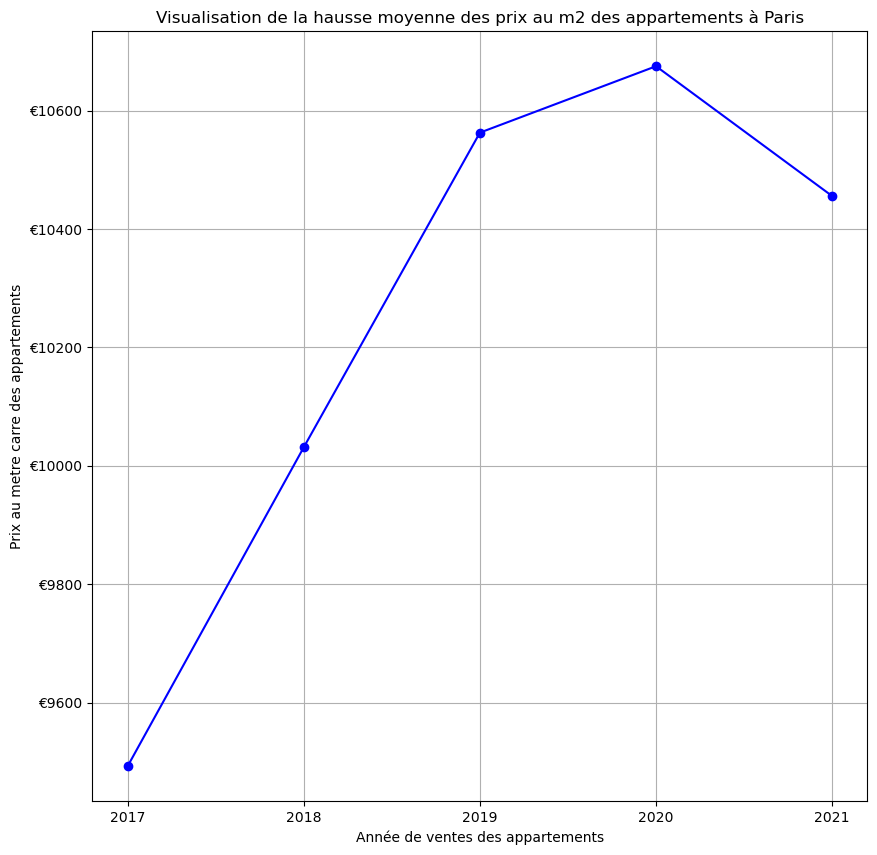

In [15]:
# Données à tracer
annees = (df_prix_surface_moyens['annee'])
Prix_m2 = df_prix_surface_moyens['prix_m2']

# Importer le module ticker
import matplotlib.ticker as ticker  

#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10, 10))
plt.plot(annees, Prix_m2, marker='o', color='blue', linestyle='-')
plt.xlabel('Année de ventes des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Visualisation de la hausse moyenne des prix au m2 des appartements à Paris')
plt.grid(True)

# Définir les années entières sur l'axe des x
plt.xticks(np.arange(min(annees), max(annees) + 1, 1))

# Afficher le graphique
plt.show()


### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [16]:
#Liste des codes postaux dans nos données

# Obtenir la liste des arrondissements présents dans les données
arrondissements = df['code_postal'].unique()

# Afficher la liste des arrondissements
print("Liste des codes postaux présents dans les données :")
print(arrondissements)

# Obtenir le nombre d'arrondissements présents dans les données
nombre_arrondissements = len(df['code_postal'].unique())

# Afficher le nombre d'arrondissements
print("Il y a", nombre_arrondissements, "arrondissements distincts dans les données.")


Liste des codes postaux présents dans les données :
[75014 75018 75016 75006 75003 75004 75007 75020 75015 75011 75009 75017
 75019 75010 75012 75013 75008 75002 75001 75005]
Il y a 20 arrondissements distincts dans les données.


In [17]:
# Créer un dictionnaire pour mapper les codes postaux aux numéros d'arrondissement
arrondissements = {}

# Parcourir les codes postaux uniques dans les données
for code_postal in df['code_postal'].unique():
    # Convertir le code postal en chaîne de caractères
    code_postal_str = str(code_postal)
    # Vérifier si la longueur du code postal est suffisante
    if len(code_postal_str) >= 2:
        # Extraire les deux derniers chiffres pour obtenir le numéro d'arrondissement
        numero_arrondissement = int(code_postal_str[-2:])
        # Ajouter le numéro d'arrondissement au dictionnaire
        arrondissements[code_postal_str] = f"{numero_arrondissement}e"

# Afficher la liste des arrondissements
print("Liste des arrondissements présents dans les données :")
for code_postal, numero_arrondissement in sorted(arrondissements.items()):
    display(f"{numero_arrondissement} arrondissement ({code_postal})")
    

Liste des arrondissements présents dans les données :


'1e arrondissement (75001)'

'2e arrondissement (75002)'

'3e arrondissement (75003)'

'4e arrondissement (75004)'

'5e arrondissement (75005)'

'6e arrondissement (75006)'

'7e arrondissement (75007)'

'8e arrondissement (75008)'

'9e arrondissement (75009)'

'10e arrondissement (75010)'

'11e arrondissement (75011)'

'12e arrondissement (75012)'

'13e arrondissement (75013)'

'14e arrondissement (75014)'

'15e arrondissement (75015)'

'16e arrondissement (75016)'

'17e arrondissement (75017)'

'18e arrondissement (75018)'

'19e arrondissement (75019)'

'20e arrondissement (75020)'

In [18]:
# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour ne conserver que les appartements
df_appartements = df[df['type_local'] == 'Appartement'].copy()

# Calculer le prix par mètre carré pour chaque transaction en utilisant .loc pour éviter l'avertissement
df_appartements.loc[:, 'prix_m2'] = df_appartements['valeur_fonciere'] / df_appartements['surface_reelle']

# Grouper par code postal et année, puis calculer les prix moyens au mètre carré pour les appartements
df_evolution_prix_m2_arrondissement = df_appartements.groupby(['code_postal', 'annee']).apply(lambda x: x['prix_m2'].mean()).reset_index(name='prix_m2')
df_evolution_prix_m2_arrondissement['prix_m2'] = round(df_evolution_prix_m2_arrondissement['prix_m2'], 1)

# Afficher le DataFrame résultant
display(df_evolution_prix_m2_arrondissement.head())

,code_postal,annee,prix_m2
0,75001,2017,11762.7
1,75001,2018,12621.2
2,75001,2019,13269.3
3,75001,2020,13406.0
4,75001,2021,13379.5


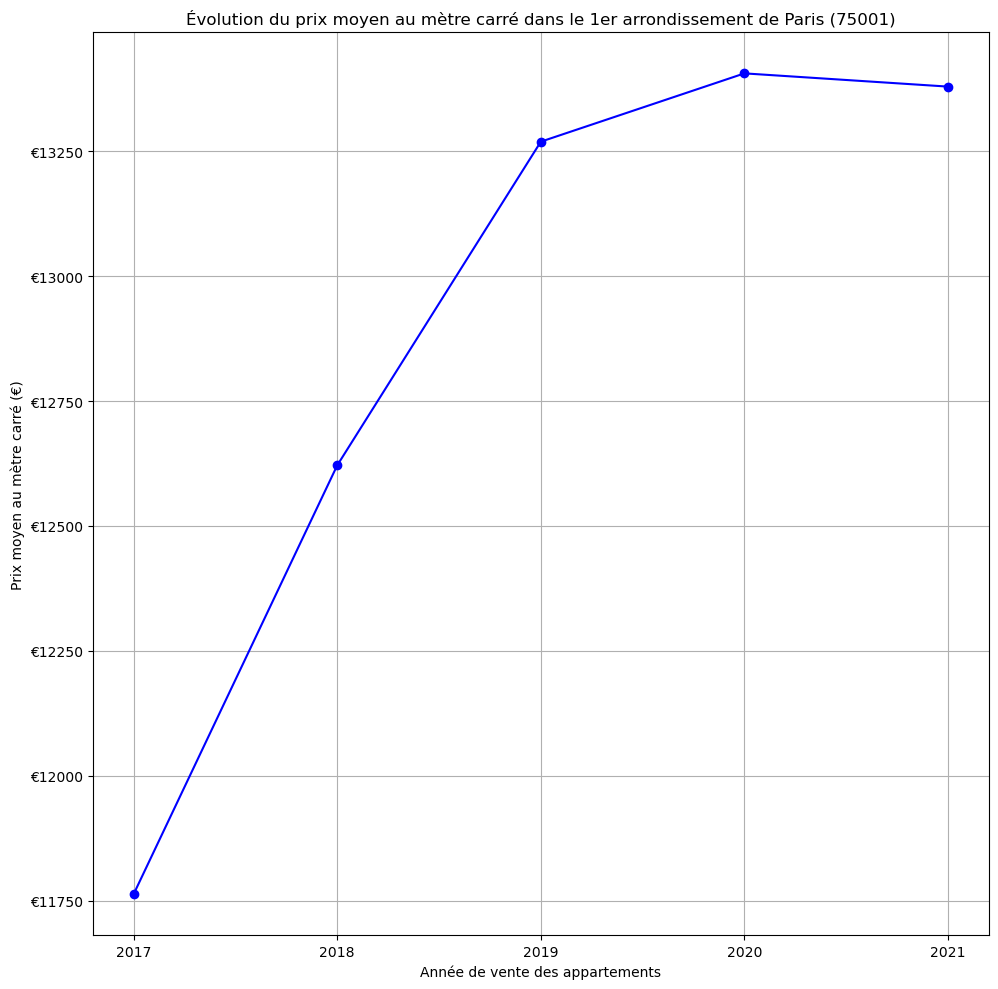

In [19]:
import matplotlib.pyplot as plt

# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour ne conserver que les appartements
df_appartements = df[df['type_local'] == 'Appartement'].copy()

# Calculer le prix par mètre carré pour chaque transaction
df_appartements['prix_m2'] = df_appartements['valeur_fonciere'] / df_appartements['surface_reelle']

# Filtrer les données pour le premier arrondissement (code postal 75001)
df_75001 = df_appartements[df_appartements['code_postal'] == 75001]

# Calculer la moyenne des prix au mètre carré par année pour le premier arrondissement
prix_m2_moyen_par_annee_75001 = df_75001.groupby('annee')['prix_m2'].mean().reset_index()

# Créer le graphique de l'évolution des prix au mètre carré au fil des années
plt.figure(figsize=(10, 10))
plt.plot(prix_m2_moyen_par_annee_75001['annee'], prix_m2_moyen_par_annee_75001['prix_m2'], marker='o', linestyle='-', color='b')
plt.xlabel('Année de vente des appartements')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.title('Évolution du prix moyen au mètre carré dans le 1er arrondissement de Paris (75001)')
plt.grid(True)
plt.xticks(prix_m2_moyen_par_annee_75001['annee'])
plt.tight_layout()

# Format de l'axe des y pour afficher les valeurs en euros
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

# Afficher le graphique
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

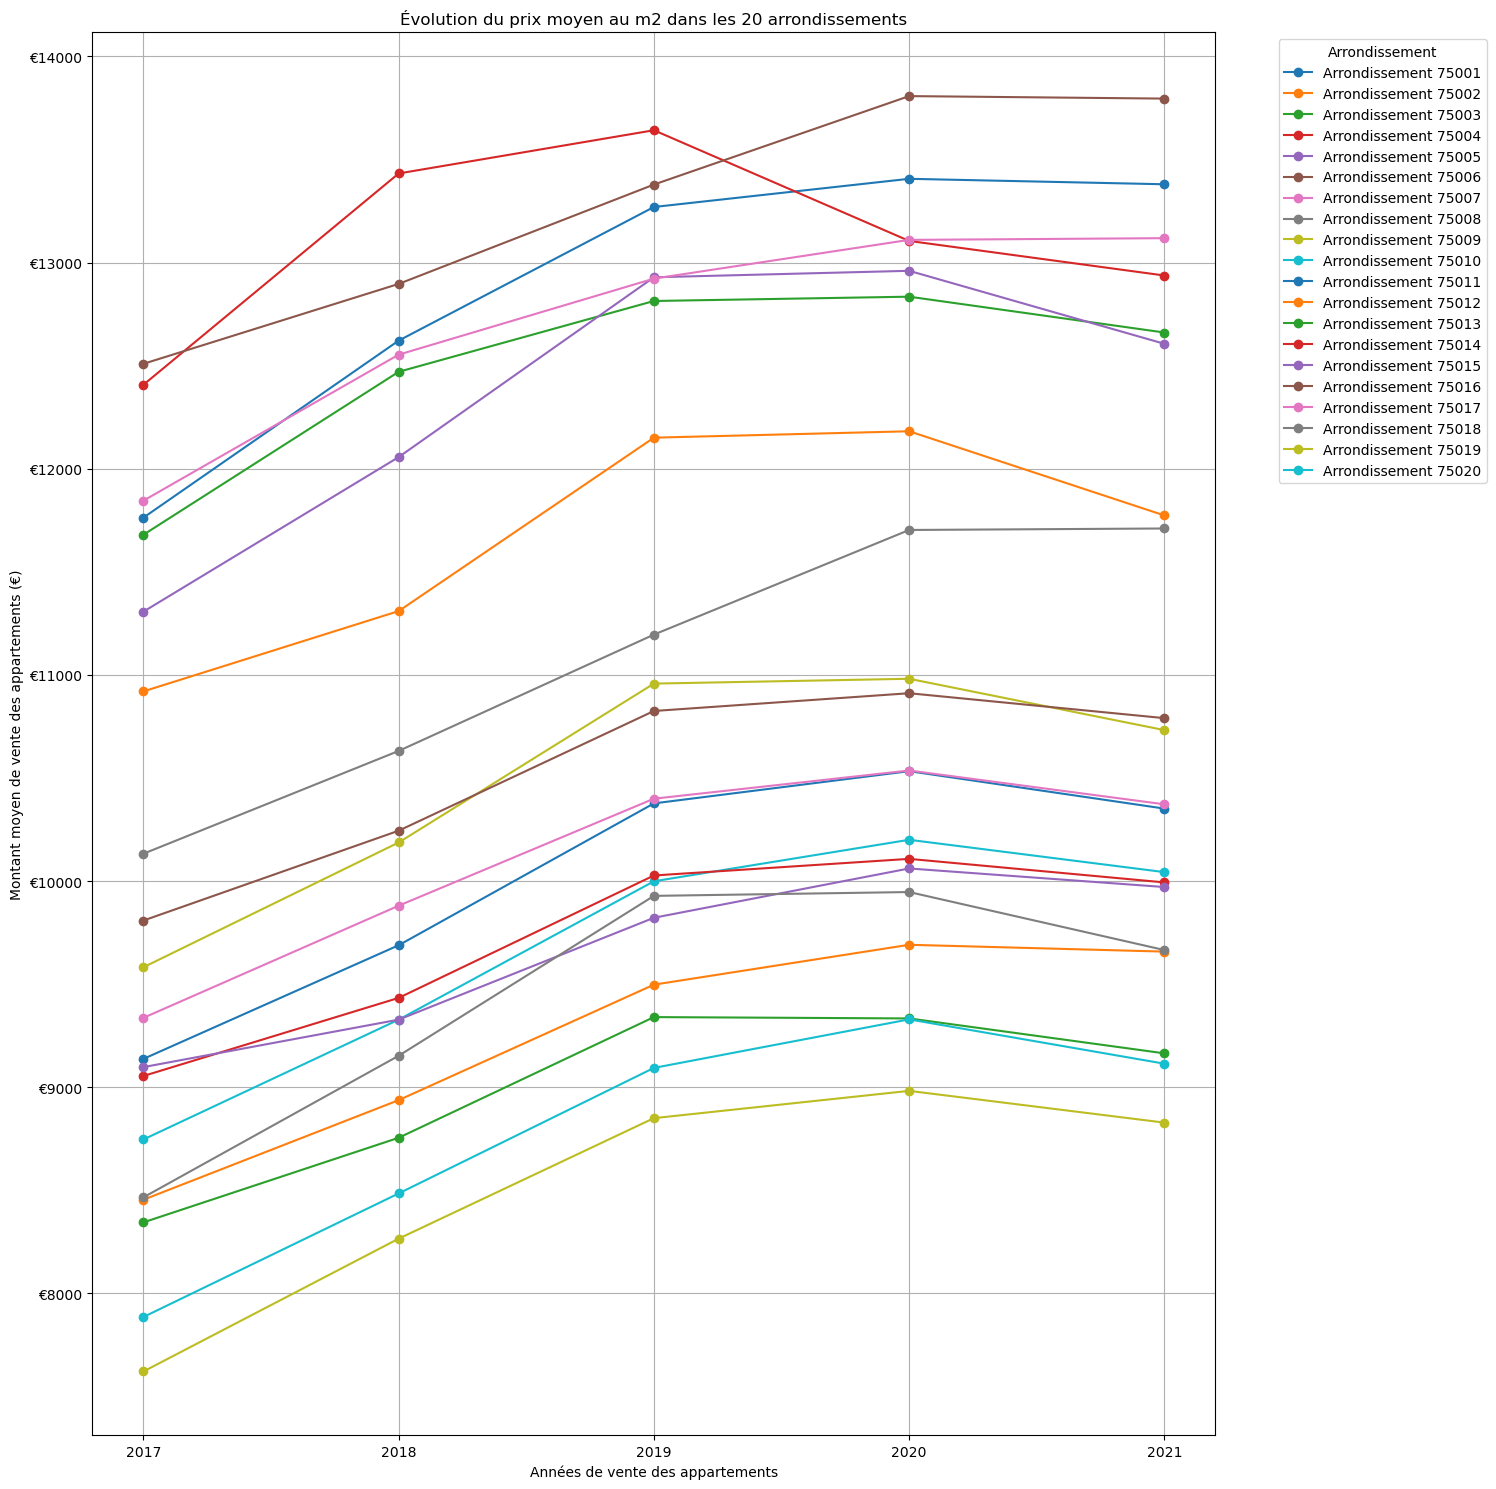

In [20]:
import matplotlib.pyplot as plt

# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour ne conserver que les appartements
df_appartements = df[df['type_local'] == 'Appartement'].copy()

# Calculer le prix par mètre carré pour chaque transaction
df_appartements['prix_m2'] = df_appartements['valeur_fonciere'] / df_appartements['surface_reelle']

# Filtrer pour ne conserver que les arrondissements de Paris (codes postaux 75001 à 75020)
df_appartements = df_appartements[df_appartements['code_postal'].between(75001, 75020)]

# Calculer la moyenne des prix au mètre carré par année et par arrondissement
df_evolution_prix_m2_arrondissement = df_appartements.groupby(['code_postal', 'annee'])['prix_m2'].mean().reset_index()
df_evolution_prix_m2_arrondissement['prix_m2'] = round(df_evolution_prix_m2_arrondissement['prix_m2'], 1)

# Création du graphique
plt.figure(figsize=(15, 15))

for code_postal in df_evolution_prix_m2_arrondissement['code_postal'].unique():
    subset = df_evolution_prix_m2_arrondissement[df_evolution_prix_m2_arrondissement['code_postal'] == code_postal]
    plt.plot(subset['annee'], subset['prix_m2'], marker='o', linestyle='-', label=f'Arrondissement {code_postal}')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements (€)')
plt.title('Évolution du prix moyen au m2 dans les 20 arrondissements')
plt.legend(title='Arrondissement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Format de l'axe des y pour afficher les valeurs en euros
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

# Afficher uniquement les années entières sur l'axe x
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Afficher le graphique
plt.show()

On observe que globalement que les prix suivent les mêmes courbes dans tous les arrondissements :

Les prix grimpent de 2017 à 2020, puis baissent légèrement entre 2020 et 2021 sans doute en raison de la crise sanitaire.

Les 6ème, 7ème et 8ème arrondissements restent stables.


### 7. Prix au metre carré par transaction dans un arrondissement

In [21]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour ne conserver que les appartements
df_appartements = df[df['type_local'] == 'Appartement'].copy()

# Calculer le prix par mètre carré pour chaque transaction en utilisant .loc pour éviter l'avertissement
df_appartements.loc[:, 'prix_m2'] = df_appartements['valeur_fonciere'] / df_appartements['surface_reelle']

# Calcul des prix moyens au mètre carré par code postal et année
df_evolution_prix_m2_arrondissement = df_appartements.groupby(['code_postal', 'annee']).apply(lambda x: x['valeur_fonciere'].mean() / x['surface_reelle'].mean()).reset_index(name='prix_m2')
df_evolution_prix_m2_arrondissement['prix_m2'] = round(df_evolution_prix_m2_arrondissement['prix_m2'], 1)

# Filtrer les données pour ne conserver que celles du 6ème arrondissement (75006)
df_75006 = df_evolution_prix_m2_arrondissement[df_evolution_prix_m2_arrondissement['code_postal'] == 75006]

# Afficher le DataFrame résultant
display(df_75006.head())

# Calculer le prix moyen au mètre carré dans le 6ème arrondissement
prix_moyen_75006 = df_75006['prix_m2'].mean()

# Afficher les résultats
print(f"Le prix moyen au mètre carré entre 2017 et 2021 dans le 6ème arrondissement est de {prix_moyen_75006:.2f} €.")


,code_postal,annee,prix_m2
25,75006,2017,12496.6
26,75006,2018,12840.8
27,75006,2019,13379.2
28,75006,2020,13815.7
29,75006,2021,13820.3


Le prix moyen au mètre carré entre 2017 et 2021 dans le 6ème arrondissement est de 13270.52 €.


On constate que le prix du mètre carré dans le 6ème arrondissement est de 13 270 € pour 10 243 € pour l'ensemble des arrondissements.

Le prix dans le 6ème arrondissement est plus cher que la moyenne des prix des autres arrondissements.

Le 6ème arrondissement est un arrondissement très recherché, avec des quartiers prestigieux comme le Saint-Germain-des-Près.

In [22]:
# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour le 6ème arrondissement (code postal 75006) et les appartements
df_75006_appartements = df[(df['code_postal'] == 75006) & (df['type_local'] == 'Appartement')].copy()

# Compter le nombre de transactions pour chaque année
nb_transactions_par_annee = df_75006_appartements.groupby('annee').size().reset_index(name='nombre_transactions')

# Afficher les résultats
print( f"Le nombre de transactions par an dans le 6ème arrondissement est de :")
display(nb_transactions_par_annee)

Le nombre de transactions par an dans le 6ème arrondissement est de :


,annee,nombre_transactions
0,2017,198
1,2018,175
2,2019,123
3,2020,108
4,2021,105


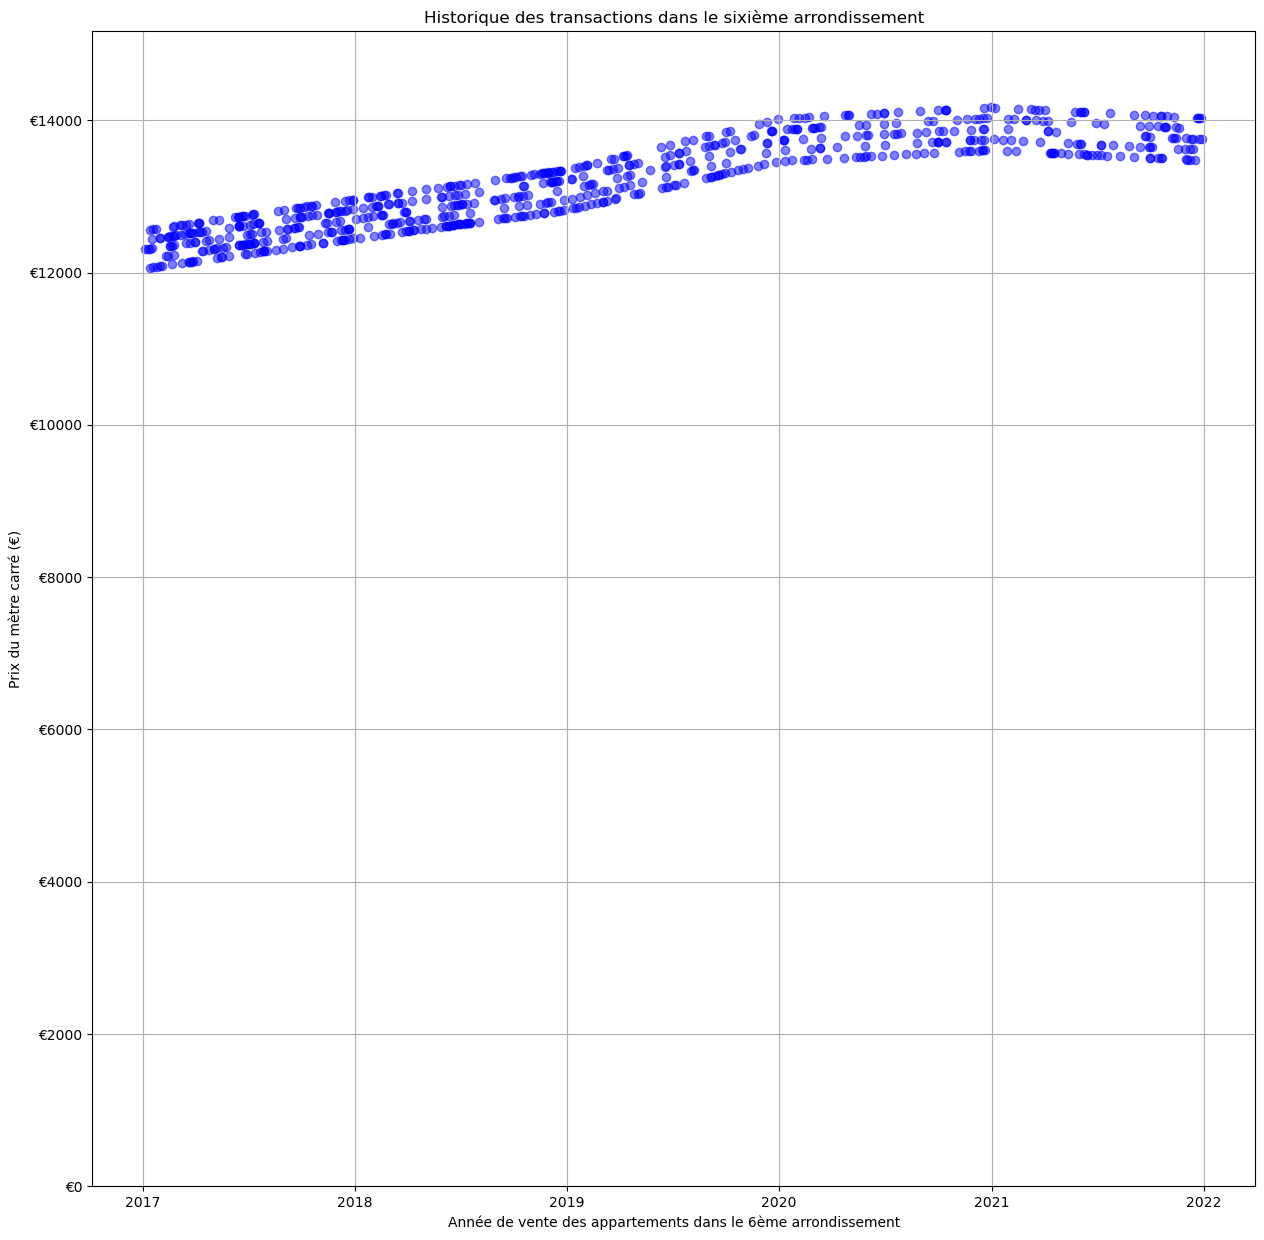

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour le 6ème arrondissement (code postal 75006) et les appartements
df_75006_appartements = df[(df['code_postal'] == 75006) & (df['type_local'] == 'Appartement')].copy()

# Calculer le prix par mètre carré pour chaque transaction
df_75006_appartements['prix_m2'] = df_75006_appartements['valeur_fonciere'] / df_75006_appartements['surface_reelle']

# Créer le scatter plot
plt.figure(figsize=(15, 15))
plt.scatter(df_75006_appartements['date_mutation'], df_75006_appartements['prix_m2'], alpha=0.5, color='blue')

plt.xlabel('Année de vente des appartements dans le 6ème arrondissement')
plt.ylabel('Prix du mètre carré (€)')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0, df_75006_appartements['prix_m2'].max() + 1000)  # Ajuster la limite supérieure en fonction des données
plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement')
plt.show()

On constate que les prix au mètre carré dans le 6ème arrondissement stagnent après une hausse continue entre 2017 et 2020.



Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

Mais avant, nous allons calculer l'évolution des prix au mètre carré des appartements dans chaque arrondissement.

In [24]:
import pandas as pd

# Supposons que df soit votre DataFrame initial contenant les données immobilières

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les données pour l'année 2021 et pour les appartements uniquement
df_2021_appartements = df[(df['annee'] == 2021) & (df['type_local'] == 'Appartement')]

# Calcul des prix moyens au mètre carré par code postal pour l'année 2021
df_prix_moyen_2021_par_arrondissement = df_2021_appartements.groupby('code_postal').apply(lambda x: x['valeur_fonciere'].sum() / x['surface_reelle'].sum()).reset_index(name='prix_m2_moyen')
df_prix_moyen_2021_par_arrondissement['prix_m2_moyen'] = round(df_prix_moyen_2021_par_arrondissement['prix_m2_moyen'], 1)

# Filtrer pour ne conserver que les arrondissements de Paris (codes postaux 75001 à 75020)
df_prix_moyen_2021_par_arrondissement = df_prix_moyen_2021_par_arrondissement[df_prix_moyen_2021_par_arrondissement['code_postal'].between(75001, 75020)]

# Afficher le DataFrame résultant, ordonné par code postal
df_prix_moyen_2021_par_arrondissement = df_prix_moyen_2021_par_arrondissement.sort_values(by='code_postal').reset_index(drop=True)

# Afficher les résultats
display(df_prix_moyen_2021_par_arrondissement)

,code_postal,prix_m2_moyen
0,75001,13381.1
1,75002,11771.5
2,75003,12662.1
3,75004,12927.7
4,75005,12600.8
5,75006,13820.3
6,75007,13112.1
7,75008,11701.0
8,75009,10742.3
9,75010,10032.6


In [25]:
import pandas as pd

# Charger le fichier Excel contenant les données
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les données pour ne conserver que les appartements
df_appartements = df[df['type_local'] == 'Appartement']

# Filtrer les données pour l'année 2020 pour les appartements
df_2020_appartements = df_appartements[df_appartements['annee'] == 2020]

# Calculer les prix moyens au mètre carré par code postal pour l'année 2020
df_prix_moyen_2020_par_arrondissement = df_2020_appartements.groupby('code_postal').apply(lambda x: x['valeur_fonciere'].sum() / x['surface_reelle'].sum()).reset_index(name='prix_m2_moyen_2020')
df_prix_moyen_2020_par_arrondissement['prix_m2_moyen_2020'] = round(df_prix_moyen_2020_par_arrondissement['prix_m2_moyen_2020'], 1)

# Filtrer pour ne conserver que les arrondissements de Paris (codes postaux 75001 à 75020)
df_prix_moyen_2020_par_arrondissement = df_prix_moyen_2020_par_arrondissement[df_prix_moyen_2020_par_arrondissement['code_postal'].between(75001, 75020)]

# Afficher le DataFrame résultant, ordonné par code postal
df_prix_moyen_2020_par_arrondissement = df_prix_moyen_2020_par_arrondissement.sort_values(by='code_postal').reset_index(drop=True)

# Répéter pour l'année 2021
df_2021_appartements = df_appartements[df_appartements['annee'] == 2021]
df_prix_moyen_2021_par_arrondissement = df_2021_appartements.groupby('code_postal').apply(lambda x: x['valeur_fonciere'].sum() / x['surface_reelle'].sum()).reset_index(name='prix_m2_moyen_2021')
df_prix_moyen_2021_par_arrondissement['prix_m2_moyen_2021'] = round(df_prix_moyen_2021_par_arrondissement['prix_m2_moyen_2021'], 1)
df_prix_moyen_2021_par_arrondissement = df_prix_moyen_2021_par_arrondissement[df_prix_moyen_2021_par_arrondissement['code_postal'].between(75001, 75020)]

# Fusionner les DataFrames pour 2020 et 2021 par code postal
df_evolution_prix_m2_par_arrondissement = pd.merge(df_prix_moyen_2020_par_arrondissement, df_prix_moyen_2021_par_arrondissement, on='code_postal', suffixes=('_2020', '_2021'))

# Calculer l'évolution en pourcentage du prix moyen au mètre carré entre 2020 et 2021
df_evolution_prix_m2_par_arrondissement['evolution_pct'] = ((df_evolution_prix_m2_par_arrondissement['prix_m2_moyen_2021'] - df_evolution_prix_m2_par_arrondissement['prix_m2_moyen_2020']) / df_evolution_prix_m2_par_arrondissement['prix_m2_moyen_2020']) * 100

# Afficher les résultats
display(df_evolution_prix_m2_par_arrondissement)

# Exporter le DataFrame vers un fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\evolution_prix_m2_par_arrondissement.xlsx"
df_evolution_prix_m2_par_arrondissement.to_excel(file_path, index=False)

print(f"Le fichier a été exporté vers {file_path}")

,code_postal,prix_m2_moyen_2020,prix_m2_moyen_2021,evolution_pct
0,75001,13398.4,13381.1,-0.129120
1,75002,12194.6,11771.5,-3.469568
2,75003,12851.8,12662.1,-1.476058
3,75004,13118.8,12927.7,-1.456688
4,75005,12976.3,12600.8,-2.893737
5,75006,13815.7,13820.3,0.033295
6,75007,13101.2,13112.1,0.083198
7,75008,11697.5,11701.0,0.029921
8,75009,10969.6,10742.3,-2.072090
9,75010,10196.9,10032.6,-1.611274


Le fichier a été exporté vers C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\evolution_prix_m2_par_arrondissement.xlsx


8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import pearsonr

# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Convertir la colonne 'date_mutation' en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Extraire l'année de la colonne 'date_mutation'
df['annee'] = df['date_mutation'].dt.year

# Filtrer les transactions pour le 6ème arrondissement (code postal 75006) et les appartements
df_75006_appartements = df[(df['code_postal'] == 75006) & (df['type_local'] == 'Appartement')].copy()

# Calculer le prix par mètre carré pour chaque transaction
df_75006_appartements['prix_m2'] = df_75006_appartements['valeur_fonciere'] / df_75006_appartements['surface_reelle']

# Convertir les dates en valeurs numériques (timestamps)
df_75006_appartements['date_numeric'] = df_75006_appartements['date_mutation'].view('int64') // 10**9  # Convertir en secondes depuis l'époque Unix

# Calculer le coefficient de corrélation de Pearson
correlation, p_value = pearsonr(df_75006_appartements['date_numeric'], df_75006_appartements['prix_m2'])

print(f"Le coefficient de corrélation de Pearson entre le prix au mètre carré et la date dans le 6ème arrondissement est de {correlation:.4f}")
print(f"La p-value est de {p_value:.4f}")



Le coefficient de corrélation de Pearson entre le prix au mètre carré et la date dans le 6ème arrondissement est de 0.9038
La p-value est de 0.0000


Le coefficient de corrélation de Pearson est de 0.90 avec une pvalue de 0. Donc, nous pouvons confirmer la corrélation.

La corrélation de Pearson est une mesure de la relation monotone entre deux variables. Un coefficient de corrélation proche de 1 indique une forte corrélation positive, ce qui signifie que lorsque l'une des variables augmente, l'autre a tendance à augmenter également. Une p-value très faible, comme 0 dans notre cas, indique que la corrélation observée est statistiquement significative.

En conclusion, sur la base de ces résultats, on peut confirmer qu'il existe une corrélation entre les prix au mètre carré et les dates de vente dans le 6ème arrondissement.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [27]:
import pandas as pd
from scipy.stats import pearsonr

# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Filtrer les transactions pour les appartements uniquement
df_appartements = df[df['type_local'] == 'Appartement']

# Calculer la corrélation entre la valeur foncière et la surface
correlation, p_value = pearsonr(df_appartements['valeur_fonciere'], df_appartements['surface_reelle'])

print(f"Le coefficient de corrélation de Pearson entre la valeur foncière et la surface est de {correlation:.4f}")
print(f"La p-value est de {p_value:.4f}")

Le coefficient de corrélation de Pearson entre la valeur foncière et la surface est de 0.9801
La p-value est de 0.0000


Le coefficient de corrélation est de 0.98 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien a une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [28]:
#On crée un dataset qui ne contient que les locaux commerciaux

# Filtrer les données pour ne conserver que les locaux industriels, commerciaux et assimilés
df_locaux_commerciaux = df[df['type_local'] == 'Local industriel. commercial ou assimilé']

# Obtenir les statistiques descriptives arrondies
stats_descriptives_arrondies = df_locaux_commerciaux.describe().round(0)

# Afficher les statistiques descriptives arrondies
display(stats_descriptives_arrondies)


,valeur_fonciere,adresse_numero,code_postal,code_type_local,surface_reelle
count,1843.0,1843.0,1843.0,1843.0,1843.0
mean,1025025.0,49.0,75011.0,4.0,88.0
std,1598348.0,56.0,5.0,0.0,150.0
min,108558.0,1.0,75001.0,4.0,11.0
25%,373832.0,11.0,75007.0,4.0,33.0
50%,617093.0,29.0,75011.0,4.0,53.0
75%,1145400.0,68.0,75016.0,4.0,98.0
max,38433590.0,401.0,75020.0,4.0,3945.0


In [29]:
# Charger le fichier Excel contenant les données
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Filtrer les données pour les locaux commerciaux uniquement
df_locaux_commerciaux = df[df['type_local'] == 'Local industriel. commercial ou assimilé'].copy()

# Convertir la colonne de dates en type datetime
df_locaux_commerciaux['date_mutation'] = pd.to_datetime(df_locaux_commerciaux['date_mutation'])

# Extraire l'année à partir de la colonne de dates
df_locaux_commerciaux['annee'] = df_locaux_commerciaux['date_mutation'].dt.year

# Calculer le prix au mètre carré pour chaque transaction
df_locaux_commerciaux['prix_m2'] = df_locaux_commerciaux['valeur_fonciere'] / df_locaux_commerciaux['surface_reelle']

# Regrouper les données par année et calculer la moyenne des prix au mètre carré pour chaque année
df_locaux_commerciaux_prix_m2_annee = round(df_locaux_commerciaux.groupby('annee')['prix_m2'].mean().reset_index(), 2)

# Afficher le DataFrame résultant
print(df_locaux_commerciaux_prix_m2_annee)

   annee   prix_m2
0   2017  10949.91
1   2018  11569.50
2   2019  11960.13
3   2020  11966.47
4   2021  12006.49


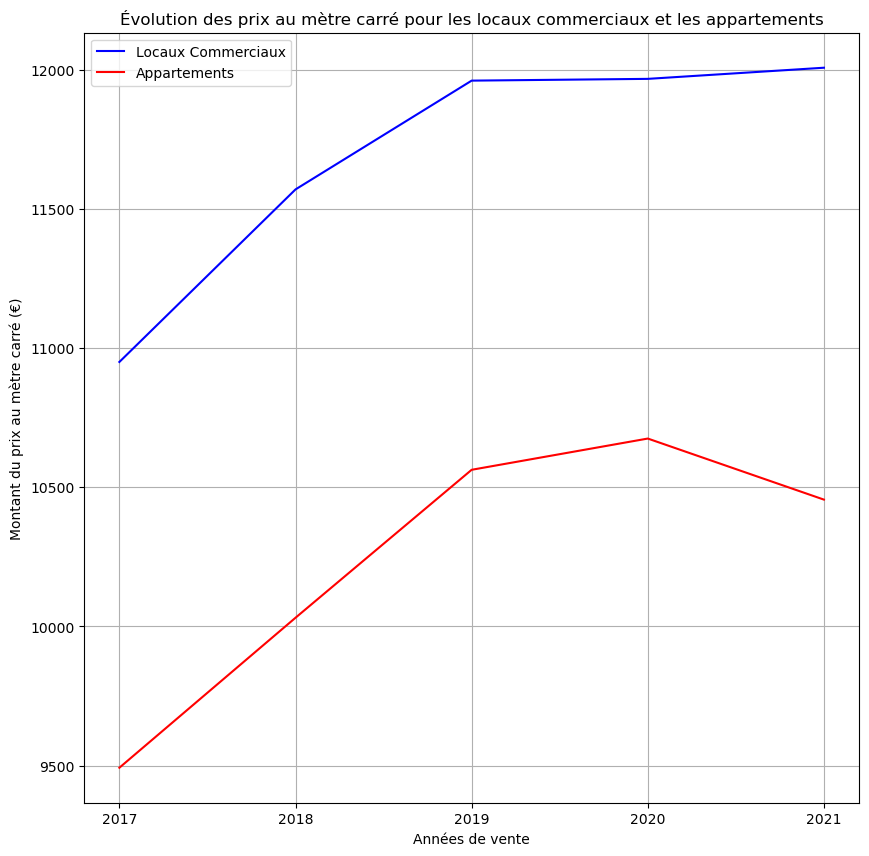

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel contenant les données
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Filtrer les données pour ne conserver que les locaux commerciaux et les appartements
df_locaux_commerciaux = df[df['type_local'] == 'Local industriel. commercial ou assimilé'].copy()
df_appartements = df[df['type_local'] == 'Appartement'].copy()

# Assurez-vous que la colonne 'date_mutation' est convertie en datetime
df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

# Filtrer les lignes avec des dates valides pour les locaux commerciaux
df_locaux_commerciaux = df_locaux_commerciaux.dropna(subset=['date_mutation'])

# Calculer le prix au mètre carré pour les locaux commerciaux
df_locaux_commerciaux['prix_m2'] = df_locaux_commerciaux['valeur_fonciere'] / df_locaux_commerciaux['surface_reelle']

# Calculer le prix au mètre carré pour les appartements
df_appartements['prix_m2'] = df_appartements['valeur_fonciere'] / df_appartements['surface_reelle']

# Extraire l'année de la colonne 'date_mutation' pour les locaux commerciaux
df_locaux_commerciaux['annee'] = df_locaux_commerciaux['date_mutation'].dt.year

# Extraire l'année de la colonne 'date_mutation' pour les appartements
df_appartements['annee'] = df_appartements['date_mutation'].dt.year

# Vérifier l'existence de la colonne prix_m2 pour les locaux commerciaux
if 'prix_m2' in df_locaux_commerciaux.columns:
    # Calculer les prix au mètre carré moyens pour les locaux commerciaux par année
    prix_m2_commerciaux = df_locaux_commerciaux.groupby('annee')['prix_m2'].mean().tolist()
else:
    print("La colonne 'prix_m2' n'est pas présente dans le DataFrame df_locaux_commerciaux.")

# Vérifier l'existence de la colonne prix_m2 pour les appartements
if 'prix_m2' in df_appartements.columns:
    # Calculer les prix au mètre carré moyens pour les appartements par année
    prix_m2_appartements = df_appartements.groupby('annee')['prix_m2'].mean().tolist()
else:
    print("La colonne 'prix_m2' n'est pas présente dans le DataFrame df_appartements.")

# Visualisation des résultats si les colonnes prix_m2 sont présentes
if 'prix_m2' in df_locaux_commerciaux.columns and 'prix_m2' in df_appartements.columns:
    # Années
    annees = ['2017', '2018', '2019', '2020', '2021']

    # Création du graphique pour visualiser l'évolution des prix au mètre carré
    plt.figure(figsize=(10, 10))
    plt.plot(annees, prix_m2_commerciaux, label='Locaux Commerciaux', color='blue')
    plt.plot(annees, prix_m2_appartements, label='Appartements', color='red')
    plt.xlabel('Années de vente')
    plt.ylabel('Montant du prix au mètre carré (€)')
    plt.legend()
    plt.grid()
    plt.title('Évolution des prix au mètre carré pour les locaux commerciaux et les appartements')
    plt.show()

In [31]:
# Charger le fichier Excel contenant les données
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

# Filtrer les données pour ne conserver que les locaux commerciaux
df_locaux_commerciaux = df[df['type_local'] == 'Local industriel. commercial ou assimilé'].copy()

# Assurez-vous que la colonne 'date_mutation' est convertie en datetime
df_locaux_commerciaux['date_mutation'] = pd.to_datetime(df_locaux_commerciaux['date_mutation'], errors='coerce')

# Filtrer les lignes avec des dates valides pour les locaux commerciaux
df_locaux_commerciaux = df_locaux_commerciaux.dropna(subset=['date_mutation'])

# Calculer le prix au mètre carré pour les locaux commerciaux
df_locaux_commerciaux['prix_m2'] = df_locaux_commerciaux['valeur_fonciere'] / df_locaux_commerciaux['surface_reelle']

# Calculer le prix moyen au mètre carré des locaux commerciaux
prix_m2_moyen_commerciaux = int(df_locaux_commerciaux['prix_m2'].mean())

print("Le prix au mètre carré moyen des locaux commerciaux entre 2017 et 2021 est de ", prix_m2_moyen_commerciaux, "€")

Le prix au mètre carré moyen des locaux commerciaux entre 2017 et 2021 est de  11705 €


Le prix au metre carré des locaux commerciaux est 11 705 € alors que le prix au mètre carré des appartements est de 10 243 €, calculé précédemment. 

Le type de bien influence donc bien sur le prix au mètre carré.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [33]:
# Charger le fichier Excel
file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"
df = pd.read_excel(file_path)

In [34]:
display(df.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2020-02-12,750130.273973,21,AV RENE COTY,75014,Paris 14e Arrondissement,2,Appartement,75
1,2021-01-19,750149.009726,10,RUE CUSTINE,75018,Paris 18e Arrondissement,2,Appartement,77
2,2017-02-07,750387.673425,169,RUE VERCINGETORIX,75014,Paris 14e Arrondissement,2,Appartement,83
3,2019-11-18,750542.184658,13,RUE SPONTINI,75016,Paris 16e Arrondissement,2,Appartement,68
4,2017-02-20,750625.039726,15,RUE DE CONDE,75006,Paris 6e Arrondissement,2,Appartement,62


In [35]:
dataset_encode=df.join(pd.get_dummies(df['code_postal'],dtype='int'))
dataset_encode=dataset_encode.join(pd.get_dummies(df['type_local'],dtype='int'))
dataset_encode['timestamp']=dataset_encode['date_mutation'].astype('datetime64[s]').view('int64') /10**9
dataset_encode.drop(['date_mutation','code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune'],axis='columns',inplace=True)


In [36]:
dataset_encode.iloc[:,1:]

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,75,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1.581466e+09
1,77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1.611014e+09
2,83,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1.486426e+09
3,68,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1.574035e+09
4,62,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1.487549e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09
26192,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1.501459e+09
26193,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1.505779e+09
26194,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1.484266e+09


In [37]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(dataset_encode.iloc[:,1:],dataset_encode['valeur_fonciere'], test_size=0.33,
                                                    random_state=42)

In [38]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [39]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
regr = LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)


In [40]:
# Affichage des prédictions
display("Prédictions:", y_predict)

'Prédictions:'

array([508197.50769722, 442064.05429743, 203555.4724432 , ...,
       173552.9460556 , 713689.04383243, 209061.38894348])

In [41]:
# Calcul de l'erreur moyenne absolue en pourcentage
mae = mean_absolute_error(y_test, y_predict)
mean_valeur_fonciere = y_test.mean()
mae_percentage = (mae / mean_valeur_fonciere) * 100

mae_percentage

6.794328965300234

In [42]:
# Afficher l'erreur moyenne absolue en pourcentage (MAPE)
print("Notre algorithme fait", round(mae_percentage, 2), "% d'erreur en moyenne sur la prédiction de la valeur foncière.")

Notre algorithme fait 6.79 % d'erreur en moyenne sur la prédiction de la valeur foncière.


La performance obtenue par l'algorithme de régression est inférieure à 10 % d'erreur moyenne sur la prédiction des prix immobiliers.

Une erreur moyenne de 6.79 % peut être considérée comme assez bonne selon le contexte. Cela signifie que, en moyenne, les prédictions du modèle sont à 6.79 % près des valeurs réelles de la propriété foncière.

Mes conclusions sur ce résultat et comment on pourrait aller plus loin.

1) Explorer et créer de nouvelles fonctionnalités ou modifier les existantes peut aider à capturer des informations pertinentes qui améliorent les performances du modèle.


2) Le fine-Tuning et le grid Search sont deux techniques essentielles pour l'optimisation des modèles en machine learning. 

Le fine-tuning est souvent utilisé pour adapter des modèles pré-entraînés à de nouvelles tâches spécifiques, tandis que le Grid Search est utilisé pour systématiquement trouver les meilleures combinaisons d'hyperparamètres pour optimiser les performances des modèles. Les deux techniques, bien que différentes, sont complémentaires et souvent utilisées conjointement dans le cadre de la construction et de l'optimisation de modèles robustes et performants.

3) Tester différents algorithmes de modélisation pour voir lequel fonctionne le mieux avec vos données. Des techniques telles que les forêts aléatoires, les réseaux de neurones, ou les méthodes ensemblistes pourraient être explorées.

4) L'utilisation de plusieurs modèles et l'agrégation de leurs prédictions peuvent souvent améliorer les performances globales.

5) Évaluation continue : Surveiller et évaluer régulièrement les performances du modèle à mesure que de nouvelles données deviennent disponibles ou que les conditions changent.

En poursuivant ces pistes, on pourrait affiner davantage votre modèle et obtenir des prédictions plus précises sur la valeur foncière.

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [43]:
import pandas as pd

# Charger le fichier excel du portefeuille des actifs de la société

file_path2 = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\portefeuille_actifs.xlsx"
df2 = pd.read_excel(file_path2)


In [44]:
# Identifier les lignes en doublon dans df2
duplicates_df2 = df2[df2.duplicated(keep=False)]

# Afficher les lignes en doublon
print("Lignes en doublon dans df2 :")
display(duplicates_df2)

Lignes en doublon dans df2 :


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
48,104,BD VOLTAIRE,75011,75111,Paris 11e Arrondissement,38.50,4,Local industriel. commercial ou assimilé,42,0,2.376881,48.859112
49,104,BD VOLTAIRE,75011,75111,Paris 11e Arrondissement,38.50,4,Local industriel. commercial ou assimilé,42,0,2.376881,48.859112
93,3,RUE DAMREMONT,75018,75118,Paris 18e Arrondissement,26.86,4,Local industriel. commercial ou assimilé,27,0,2.332450,48.887351
94,3,RUE DAMREMONT,75018,75118,Paris 18e Arrondissement,26.86,4,Local industriel. commercial ou assimilé,27,0,2.332450,48.887351


In [45]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df2_encode=df2.join(pd.get_dummies(df2['code_postal'], dtype='int'))
df2_encode=df2_encode.join(pd.get_dummies(df2['type_local'],dtype='int'))

# Création de la colonne timestamp
import datetime as dt
df2_encode['timestamp']=dt.datetime(2022,12,31)
df2_encode['timestamp']=df2_encode['timestamp'].astype('datetime64[s]').view('int64')/10**9

# Suppression des colonnes non nécessaires
df2_encode.drop(['adresse_numero','adresse_nom_voie','code_postal','code_commune','nom_commune','surface_carrez','code_type_local','type_local','nombre_pieces_principales','longitude','latitude'],axis='columns',inplace=True)
df2_encode.head(5)


,surface_reelle_bati,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,175,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1.672445e+09
1,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
2,39,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1.672445e+09
3,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1.672445e+09
4,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1.672445e+09


In [46]:
#Conversion du dataframe en str
df2_encode.columns = df2_encode.columns.astype(str)

In [47]:
# Renommer la colonne 'surface_reelle_bati' en 'surface_reelle'
df2_encode.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
df2_encode

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,175,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1.672445e+09
1,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
2,39,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1.672445e+09
3,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1.672445e+09
4,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1.672445e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,93,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
271,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1.672445e+09
272,26,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
273,38,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09


In [48]:
#On effectue la prédiction
regr = LinearRegression()
regr.fit(X_train, y_train)

y_predict = regr.predict(df2_encode).round(1)

#On vérifie les 10 premières valeurs
y_predict[:10]

array([2021521.1,  589395.9,  440525.3,  263286.6,  284181.3,  357312.7,
        378207.4,  869232.6,  543009.8,  600553.3])

In [49]:
df2_encode['estimation'] = y_predict.tolist()
df_particulier = df2_encode.loc[df2_encode['Appartement']==1]
df_corporate = df2_encode.loc[df2_encode['Local industriel. commercial ou assimilé']==1]

In [50]:
#Valorisation du portefeuille sur le segment particulier
valorisation_particuliers = df_particulier['estimation'].sum()
print('La valorisation du segment particuliers est (en millions d\'euros):', round(valorisation_particuliers / 1_000_000, 2))


La valorisation du segment particuliers est (en millions d'euros): 71.25


In [51]:
#Valorisation du portefeuille sur le segment corporate
valorisation_corporate = df_corporate['estimation'].sum()
print('La valorisation du segment corporate est (en millions d\'euros):', round(valorisation_corporate / 1_000_000, 2))


La valorisation du segment corporate est (en millions d'euros): 98.57


In [52]:
# Exporter toutes les prédictions dans un fichier CSV
output_file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\predictionsdefinitive.csv"
df2_encode['estimation'].to_csv(output_file_path, index=False)
print(f"Toutes les prédictions ont été exportées dans le fichier {output_file_path}")

Toutes les prédictions ont été exportées dans le fichier C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\predictionsdefinitive.csv


Mes conclusions sur le Segment avec la plus grande Valorisation et les limites de cette estimation :

La valorisation du segment corporate (locaux industriels, commerciaux ou assimilés) est de 98.57 millions d'euros. La valorisation du segment particuliers (appartements) est de 71.25 millions d'euros. Ainsi, le segment corporate a la plus grande valorisation dans votre portefeuille immobilier.

Les locaux industriels et commerciaux peuvent générer des revenus plus élevés en termes de location et d'activités commerciales, ce qui pourrait expliquer leur plus grande valorisation.

Ces types de propriétés sont souvent plus grandes en superficie et situées dans des zones commerciales clés, augmentant leur valeur foncière.

Avoir une forte valorisation dans le segment corporate peut être bénéfique pour la diversification de votre portefeuille, réduisant la dépendance à un seul type de bien immobilier.

Par contre, si les données utilisées pour entraîner le modèle ne sont pas représentatives de l'ensemble du marché, les prédictions peuvent être biaisées.

Le modèle utilisé (LinearRegression, par exemple) peut avoir des limites en capturant la complexité du marché immobilier. Des modèles plus avancés (comme les modèles d'apprentissage profond) pourraient fournir des prédictions plus précises.

Les modèles linéaires font certaines hypothèses sur les relations entre les variables. Si ces hypothèses sont violées, les résultats peuvent être inexacts.

Les conditions économiques changeantes, comme les taux d'intérêt, l'inflation et les politiques fiscales, peuvent affecter les valeurs immobilières.

Des événements imprévus, comme des catastrophes naturelles ou des changements de réglementation, peuvent également impacter la valeur des propriétés. La pandémie du covid en 2020 en est le meilleur exemple...

Conclusion:

La valorisation du segment corporate étant supérieure à celle des particuliers, il pourrait être intéressant de considérer ce segment pour des investissements futurs.

Cependant, il est crucial de tenir compte des limites de notre estimation et de continuer à affiner le modèle avec des données plus récentes et plus représentatives pour obtenir des prédictions plus précises.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [53]:
#On importe les données dans un dataframe

import pandas as pd

file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\historique_immobilier_paris_2017_2021_vdef2.xlsx"

# Importer les données dans un DataFrame
df_test = pd.read_excel(file_path)

# Affichage des premières lignes du DataFrame

display(df_test.head())


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2020-02-12,750130.273973,21,AV RENE COTY,75014,Paris 14e Arrondissement,2,Appartement,75
1,2021-01-19,750149.009726,10,RUE CUSTINE,75018,Paris 18e Arrondissement,2,Appartement,77
2,2017-02-07,750387.673425,169,RUE VERCINGETORIX,75014,Paris 14e Arrondissement,2,Appartement,83
3,2019-11-18,750542.184658,13,RUE SPONTINI,75016,Paris 16e Arrondissement,2,Appartement,68
4,2017-02-20,750625.039726,15,RUE DE CONDE,75006,Paris 6e Arrondissement,2,Appartement,62


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [54]:
# Calculer le prix au mètre carré
df_test['prix_m2'] = round((df_test['valeur_fonciere'] / df_test['surface_reelle']), 2)

# Affichage des premières lignes du DataFrame
display(df_test.head())


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2020-02-12,750130.273973,21,AV RENE COTY,75014,Paris 14e Arrondissement,2,Appartement,75,10001.74
1,2021-01-19,750149.009726,10,RUE CUSTINE,75018,Paris 18e Arrondissement,2,Appartement,77,9742.19
2,2017-02-07,750387.673425,169,RUE VERCINGETORIX,75014,Paris 14e Arrondissement,2,Appartement,83,9040.82
3,2019-11-18,750542.184658,13,RUE SPONTINI,75016,Paris 16e Arrondissement,2,Appartement,68,11037.39
4,2017-02-20,750625.039726,15,RUE DE CONDE,75006,Paris 6e Arrondissement,2,Appartement,62,12106.86


In [55]:
# Supprimer les colonnes 'valeur_fonciere', 'nom commune' et 'surface_reelle'
df_test.drop(columns=['date_mutation', 'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie','nom_commune', 'code_type_local', 'type_local','surface_reelle'], inplace=True)

In [56]:
# Affichage des premières lignes du DataFrame
display(df_test.head())


,code_postal,prix_m2
0,75014,10001.74
1,75018,9742.19
2,75014,9040.82
3,75016,11037.39
4,75006,12106.86


In [57]:
from sklearn.cluster import KMeans
import numpy as np

In [58]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_test[['prix_m2']])
df_test['cluster'] = kmeans.labels_


In [59]:
# Identifier les clusters avec les valeurs les plus élevées et les plus basses
cluster_0_mean = df_test[df_test['cluster'] == 0]['prix_m2'].mean()
cluster_1_mean = df_test[df_test['cluster'] == 1]['prix_m2'].mean()

# Réassigner les clusters pour que 0 soit pour les plus grosses valeurs et 1 pour les plus petites
if cluster_0_mean < cluster_1_mean:
    df_test['cluster'] = df_test['cluster'].apply(lambda x: 1 if x == 0 else 0)

# Afficher les résultats
display(df_test[['code_postal', 'prix_m2', 'cluster']].head(10))

,code_postal,prix_m2,cluster
0,75014,10001.74,1
1,75018,9742.19,1
2,75014,9040.82,1
3,75016,11037.39,1
4,75006,12106.86,0
5,75003,12942.33,0
6,75004,13649.19,0
7,75007,13903.83,0
8,75016,9625.95,1
9,75020,9751.67,1


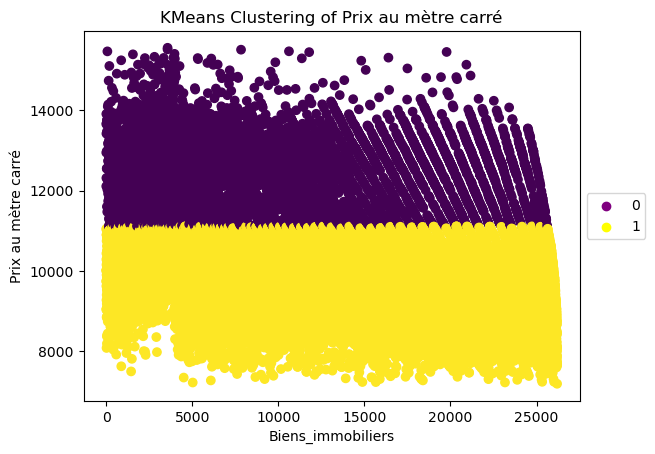

In [60]:
import matplotlib.pyplot as plt
   
# Visualize the clusters
plt.scatter(df_test.index, df_test['prix_m2'], c=df_test['cluster'], cmap='viridis')
plt.xlabel('Biens_immobiliers')
plt.ylabel('Prix au mètre carré')
plt.title('KMeans Clustering of Prix au mètre carré')

# Create custom legend
legend_labels = {'0': 'purple', '1': 'yellow'}
for label, color in legend_labels.items():
    plt.scatter([], [], color=color, label=label)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [61]:
# On vérifie les données de la prédiction

# Interpréter les clusters
# Cluster avec la valeur moyenne du prix au mètre carré la plus basse = 1
# Cluster avec la valeur moyenne du prix au mètre carré la plus élevée = 0
cluster_means = df_test.groupby('cluster')['prix_m2'].mean()
cluster_labels = cluster_means.idxmin(), cluster_means.idxmax()
display(cluster_means)
display(cluster_labels)

cluster
0    12542.978810
1     9680.392475
Name: prix_m2, dtype: float64

(1, 0)

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

In [62]:
# Remplacer les valeurs des clusters par les labels appropriés
df_test['label'] = df_test['cluster'].map({0: 'Local industriel, commercial ou assimilé', 1: 'Appartement'})


In [63]:
#On affiche les résultats
#Afficher les résultats pour vérifier les modifications
display(df_test.head(10))

,code_postal,prix_m2,cluster,label
0,75014,10001.74,1,Appartement
1,75018,9742.19,1,Appartement
2,75014,9040.82,1,Appartement
3,75016,11037.39,1,Appartement
4,75006,12106.86,0,"Local industriel, commercial ou assimilé"
5,75003,12942.33,0,"Local industriel, commercial ou assimilé"
6,75004,13649.19,0,"Local industriel, commercial ou assimilé"
7,75007,13903.83,0,"Local industriel, commercial ou assimilé"
8,75016,9625.95,1,Appartement
9,75020,9751.67,1,Appartement


In [64]:
import pandas as pd

file_path = r"C:\Users\benoitahsee\OneDrive\Documents\Openclassrooms\Projet 8\Ressources\echantillon_a_classer2.xlsx"

# Importer les données dans un DataFrame
df_test = pd.read_excel(file_path)

# Affichage des premières lignes du DataFrame

display(df_test.head())

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


In [65]:
# Calculer le prix au mètre carré
df_test['prix_m2'] = round((df_test['valeur_fonciere'] / df_test['surface_reelle']), 2)

# Affichage des premières lignes du DataFrame
display(df_test.head())

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.44
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.57
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.70
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.14
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.61


In [66]:
# Supprimer les colonnes 'valeur_fonciere', 'nom commune' et 'surface_reelle'
df_test.drop(columns=['valeur_fonciere', 'surface_reelle','nom_commune'], inplace=True)

In [67]:
# Affichage des premières lignes du DataFrame
display(df_test.head())


,code_postal,prix_m2
0,75019,9871.44
1,75019,10045.57
2,75019,9194.70
3,75019,9469.14
4,75019,7463.61


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévés dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [68]:
# Appliquer KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
df_test['cluster'] = kmeans.fit_predict(df_test[['prix_m2']])

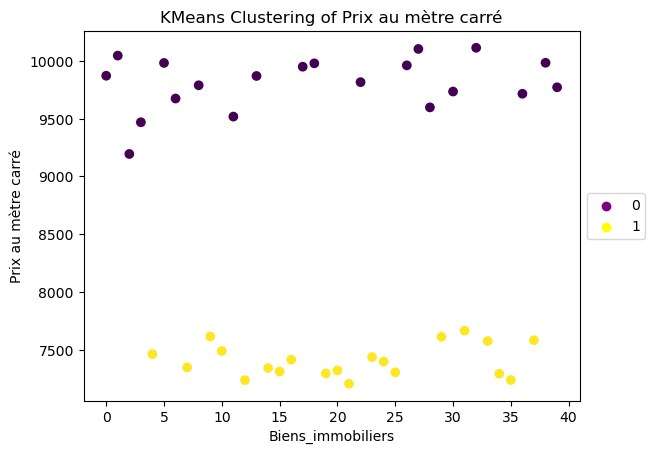

In [69]:
import matplotlib.pyplot as plt
   
# Visualize the clusters
plt.scatter(df_test.index, df_test['prix_m2'], c=df_test['cluster'], cmap='viridis')
plt.xlabel('Biens_immobiliers')
plt.ylabel('Prix au mètre carré')
plt.title('KMeans Clustering of Prix au mètre carré')

# Create custom legend
legend_labels = {'0': 'purple', '1': 'yellow'}
for label, color in legend_labels.items():
    plt.scatter([], [], color=color, label=label)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [70]:
# Interpréter les clusters
# Cluster avec la valeur moyenne du prix au mètre carré la plus basse = 1
# Cluster avec la valeur moyenne du prix au mètre carré la plus élevée = 0
cluster_means = df_test.groupby('cluster')['prix_m2'].mean()
cluster_labels = cluster_means.idxmin(), cluster_means.idxmax()
display(cluster_means)
display(cluster_labels)

cluster
0    9806.924
1    7408.774
Name: prix_m2, dtype: float64

(1, 0)

In [71]:
#On affiche les résultats
#Afficher les résultats pour vérifier les modifications
display(df_test.head(10))

,code_postal,prix_m2,cluster
0,75019,9871.44,0
1,75019,10045.57,0
2,75019,9194.70,0
3,75019,9469.14,0
4,75019,7463.61,1
5,75019,9982.02,0
6,75019,9674.26,0
7,75019,7348.92,1
8,75019,9789.05,0
9,75019,7616.42,1


In [72]:
# Remplacer les valeurs des clusters par les labels appropriés
df_test['label'] = df_test['cluster'].map({0: 'Local industriel, commercial ou assimilé', 1: 'Appartement'})


In [73]:
#On affiche les résultats
display(df_test)


,code_postal,prix_m2,cluster,label
0,75019,9871.44,0,"Local industriel, commercial ou assimilé"
1,75019,10045.57,0,"Local industriel, commercial ou assimilé"
2,75019,9194.70,0,"Local industriel, commercial ou assimilé"
3,75019,9469.14,0,"Local industriel, commercial ou assimilé"
4,75019,7463.61,1,Appartement
5,75019,9982.02,0,"Local industriel, commercial ou assimilé"
6,75019,9674.26,0,"Local industriel, commercial ou assimilé"
7,75019,7348.92,1,Appartement
8,75019,9789.05,0,"Local industriel, commercial ou assimilé"
9,75019,7616.42,1,Appartement


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'Analyse et les limites de l'exercice :

L'ananlyse de l'évolution des prix de l'immobilier et l'exercice de prédiction de valeurs futures ne sont pas toujours simples car l'immobilier dépend de nombreuses variables : contexte économique, taux d'intérêt, nouvelles règlementations, inflation, état et âge du bien, localisation...

De plus, il s'agit d'une des villes les plus chères du monde, avec des écarts très importants entre les arrondissements.

Toutefois, nous avons pu dégager une tendance baissière pour les prix des appartements et une stabilité des prix pour les locaux industriels, commerciaux ou assimilés.

Nous préconisons donc la vente pour récupérer de la trésorerie des appartements de petite ou moyenne surface, dans les arrondissements dits "populaires" (13ème, 18ème, 19ème et 20ème arrondissement).

L'autre facteur de vente sera de vendre les plus anciens appartements à faible DPE (Diagnostic de Performance Energétique) compte tenu des investissements conséquents pour remettre les biens aux normes.

Compte-tenu des nombreux variables évoqués, il faut raisonner au cas par cas avant de vendre soit un appartement ou un local commercial.

Il est prudent de conserver une diversification de ses biens pour ne pas être dépendant d'un seul type de bien.
